# Vineeth Reddy
## Data Science and Business Analytics Intern @ The Sparks Foundation
### Prediction using Decision Tree Algorithm

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [2]:
#importing the dataset
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
#viewing the first 5 rows of the data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#splitting into X(dependent variables) and Y(target)
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
#statistical info of the data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=0)

In [8]:
#shape of train and test data
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [9]:
#fitting the model
from sklearn import tree
clftree=tree.DecisionTreeClassifier()
clftree.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
#predicting the values
y_train_pred=clftree.predict(X_train)
y_test_pred=clftree.predict(X_test)

In [11]:
#viewing the predicted values
y_test_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [12]:
#viewing the confusion matrix for train data
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 44]], dtype=int64)

In [13]:
#viewing the confusion matrix for test data
confusion_matrix(y_test,y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [14]:
#printing the accuracy for train data
accuracy_score(y_train,y_train_pred)

1.0

In [15]:
#printing the accuracy for test data
accuracy_score(y_test,y_test_pred)

1.0

In [16]:
#creating the tree variables
dot_data=tree.export_graphviz(clftree,out_file=None,feature_names=X_train.columns,filled=True)

In [17]:
#importing the libraries required for printing the tree
from IPython.display import Image
import pydotplus

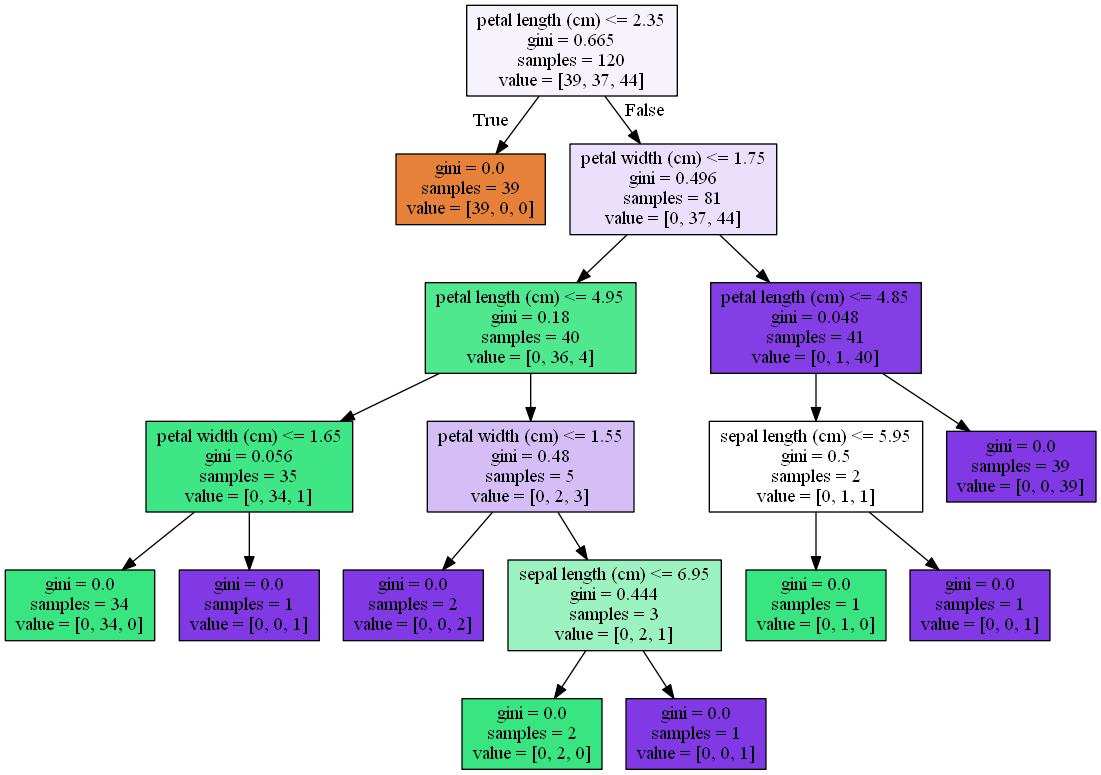

In [18]:
#viewing the tree
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

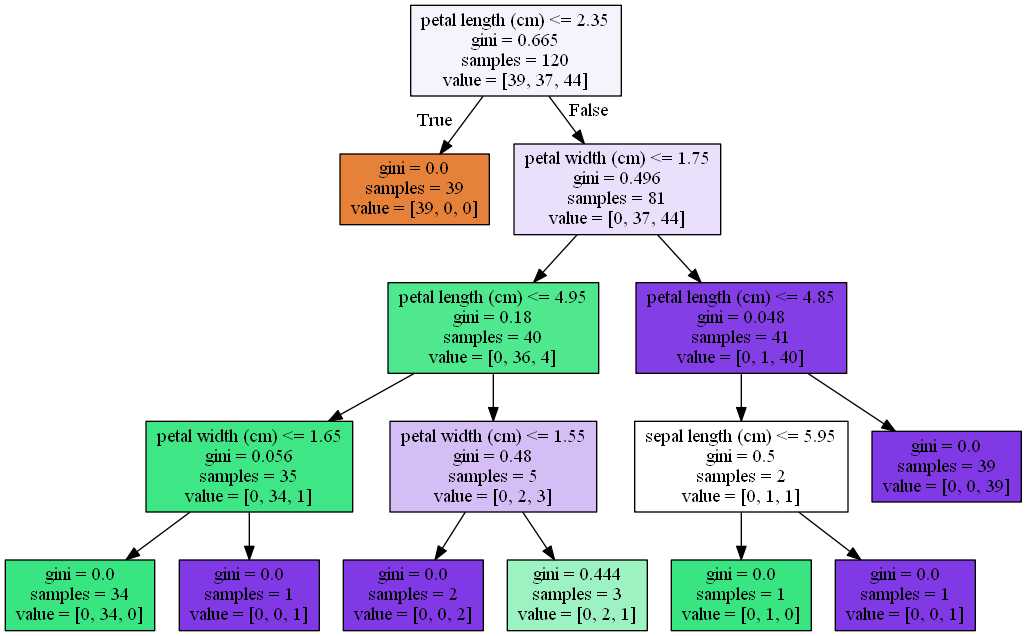

In [19]:
#tree with filter of max_depth
clftree1=tree.DecisionTreeClassifier(max_depth=4)
clftree1.fit(X_train,y_train)
dot_data=tree.export_graphviz(clftree1, out_file=None,feature_names=X_train.columns,filled=True)
graph1=pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

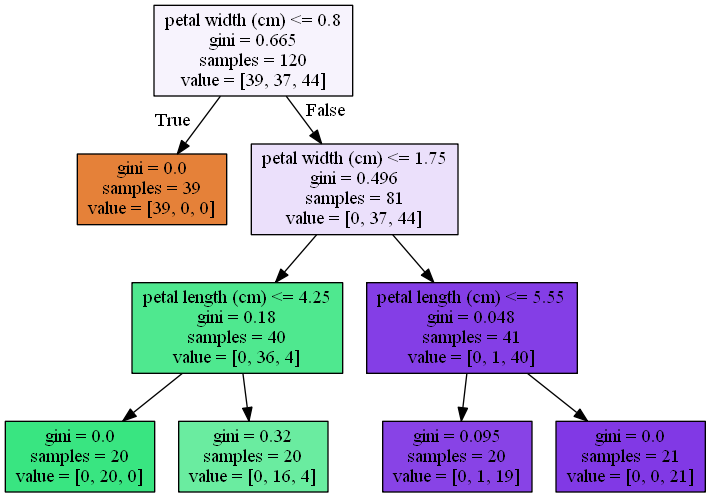

In [20]:
#tree with filter of min_samples_leaf
clftree2=tree.DecisionTreeClassifier(min_samples_leaf=20)
clftree2.fit(X_train,y_train)
dot_data=tree.export_graphviz(clftree2, out_file=None,feature_names=X_train.columns,filled=True)
graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

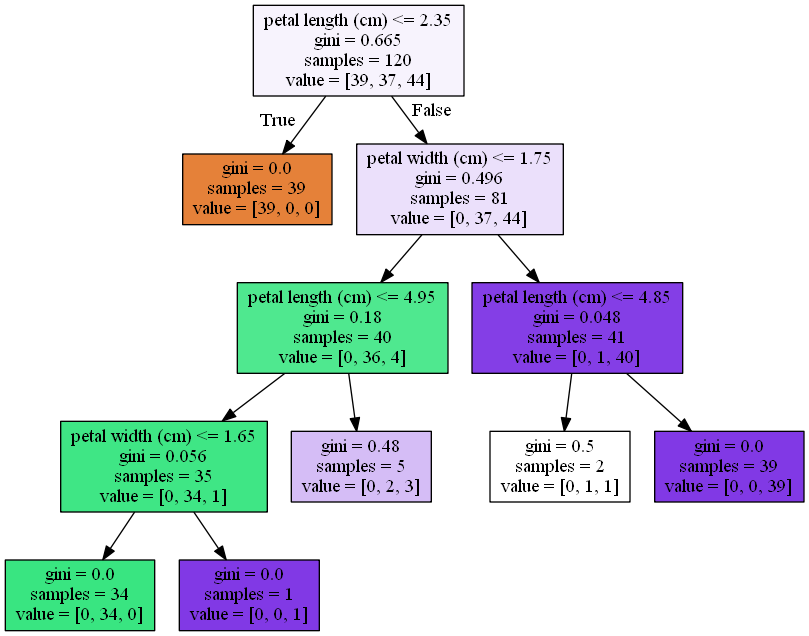

In [21]:
#tree with filter of min_samples_split
clftree3=tree.DecisionTreeClassifier(min_samples_split=20)
clftree3.fit(X_train,y_train)
dot_data=tree.export_graphviz(clftree3, out_file=None,feature_names=X_train.columns,filled=True)
graph3=pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())